In [1]:
import time
import xarray
import numpy as np
from matplotlib import pyplot as plt

### Loading data

In [2]:
ds = xarray.open_dataset("BedMachineGreenland-v5.nc")

In [3]:
ds = ds.sel(x=slice(-226_000, -140_000), y=slice(-2_250_000, -2_300_000))
ds

<xarray.Dataset>
Dimensions:    (x: 573, y: 333)
Coordinates:
  * x          (x) int32 -225875 -225725 -225575 ... -140375 -140225 -140075
  * y          (y) int32 -2250125 -2250275 -2250425 ... -2299775 -2299925
Data variables:
    mapping    |S1 ...
    mask       (y, x) int8 ...
    surface    (y, x) float32 ...
    thickness  (y, x) float32 ...
    bed        (y, x) float32 ...
    errbed     (y, x) float32 ...
    source     (y, x) int8 ...
    dataid     (y, x) int8 ...
    geoid      (y, x) int16 ...
Attributes: (12/16)
    Conventions:                 CF-1.7
    Title:                       BedMachine Greenland
    Author:                      Mathieu Morlighem
    version:                     28-Jul-2022 (v5.5)
    nx:                          10218.0
    ny:                          18346.0
    ...                          ...
    xmin:                        -652925
    ymax:                        -632675
    spacing:                     150
    no_data:                     -9999.0
    license:                     No restrictions on access or use
    Data_citation:               Morlighem M. et al., (2017), BedMachine v3: ...

In [16]:
x = ds["surface"].x
y = ds["surface"].y
surface = np.array(ds["surface"], dtype=np.float64)
thickness = np.array(ds["thickness"], dtype=np.float64)

### Smoothing the surface elevation DEM

In [5]:
import dem_smoothing

In [6]:
dx = abs(float(x[1] - x[0]))
dy = abs(float(y[1] - y[0]))
dx,dy

(150.0, 150.0)

In [20]:
sigma_k = 4.0 # sigma = 4 ice thicknesses
w_k = 3.0     # smoothing window half width = 3 sigma 
w_max = 10**4 # maximum half-width (large enough to be avoid limiting)

start = time.time()
smoothed_gaussian = dem_smoothing.smooth_gaussian(surface, thickness, sigma_k, w_k, w_max, dx, dy)
end = time.time()
print(f"Smoothing using the Gaussian filter took {end - start} seconds")

Smoothing using the Gaussian filter took 2.8474924564361572 seconds


In [21]:
sigma_k = 10.0 # sigma is 10 ice thicknesses
w_max = 10**4  # maximum half-width (large enough to be avoid limiting)

start = time.time()
smoothed_triangular = dem_smoothing.smooth_triangular(surface, thickness, sigma_k, w_max, dx, dy)
end = time.time()
print(f"Smoothing using the triangular filter took {end - start} seconds")

Smoothing using the triangular filter took 1.18392014503479 seconds


### Plotting original and smoothed DEM

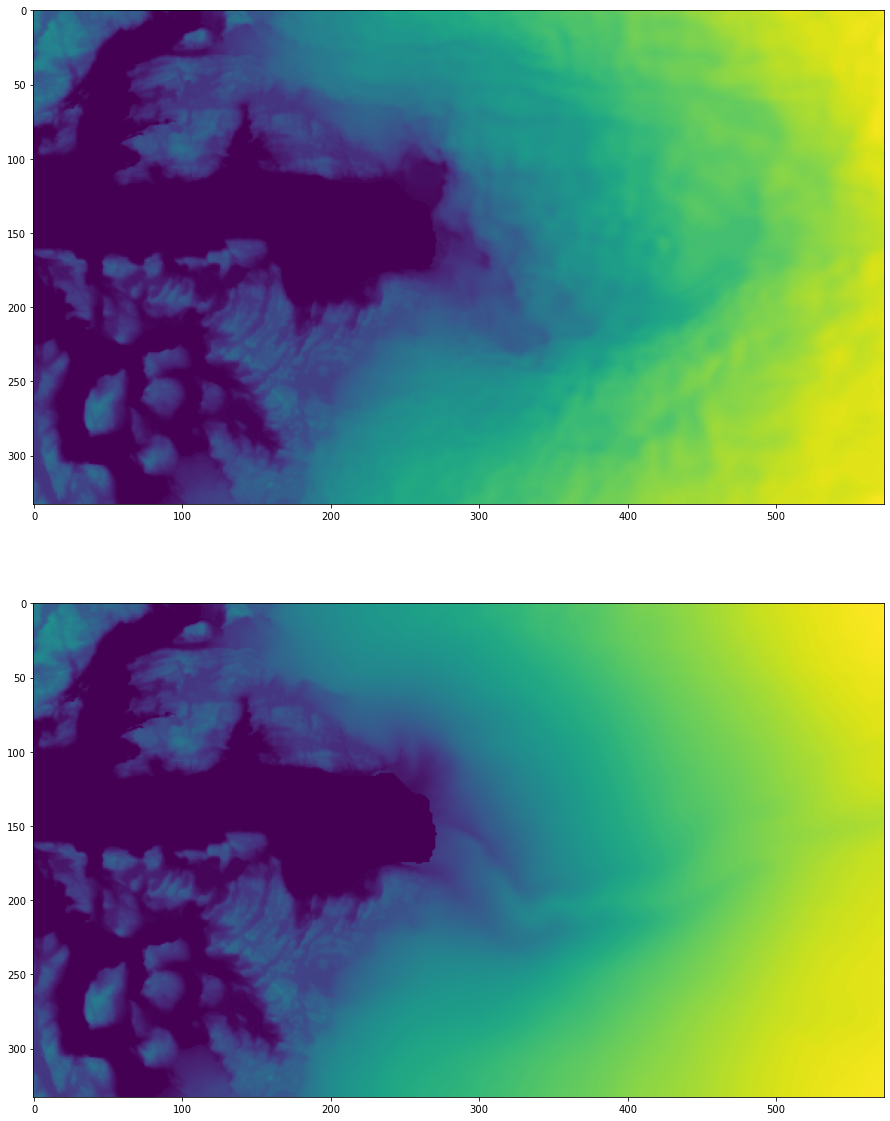

In [9]:
fig, axs = plt.subplots(2)
fig.set_size_inches(20, 20)
axs[0].imshow(surface)
axs[1].imshow(smoothed_triangular)

### Visualizing the filter

In [17]:
N = 201
x = np.linspace(-3, 3, N)
y = x

xx,yy = np.meshgrid(x, y)

In [18]:
f = np.vectorize(dem_smoothing.triangular)
g = np.vectorize(dem_smoothing.gaussian)

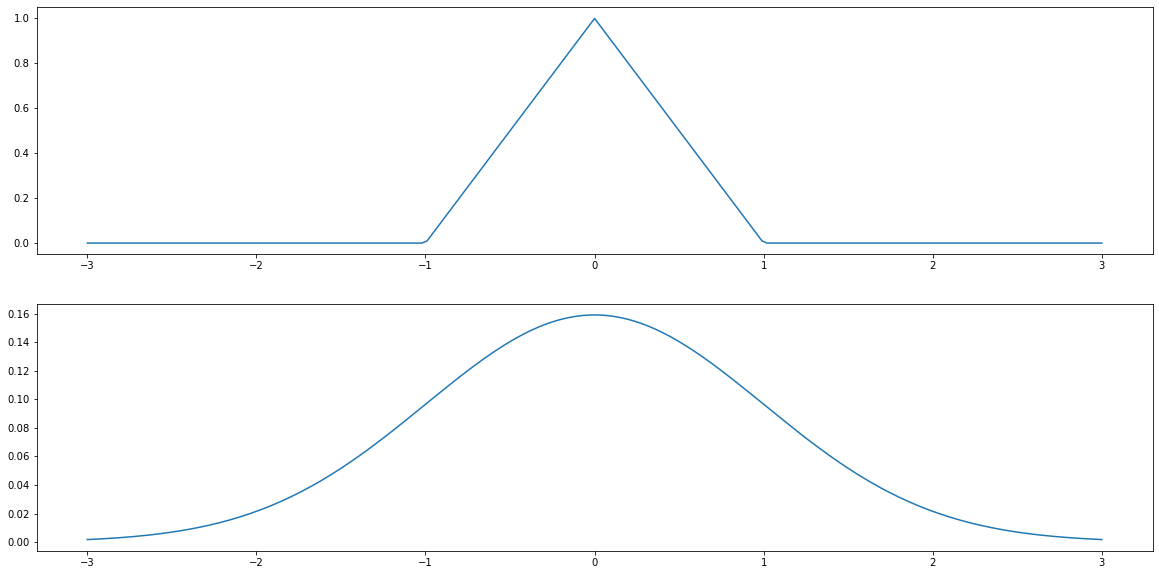

In [19]:
fig, axs = plt.subplots(2)
fig.set_size_inches(20, 10)
axs[0].plot(x, f(1, x, 0))
axs[1].plot(x, g(1, x, 0))